In [3]:
import pandas as pd
import sys
# from pandas import datetools
import datetime
from datetime import timedelta
import os
# import import_ipynb
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

filedir = '/Users/santamag/Desktop/GUILLEM/wrkng_dirs_clean/growthCurves/'
gcExcels = ['010720GlycerolGrowthCurve_Hildi.xlsx', '010720GlycerolGrowthCurve_Maurice.xlsx']

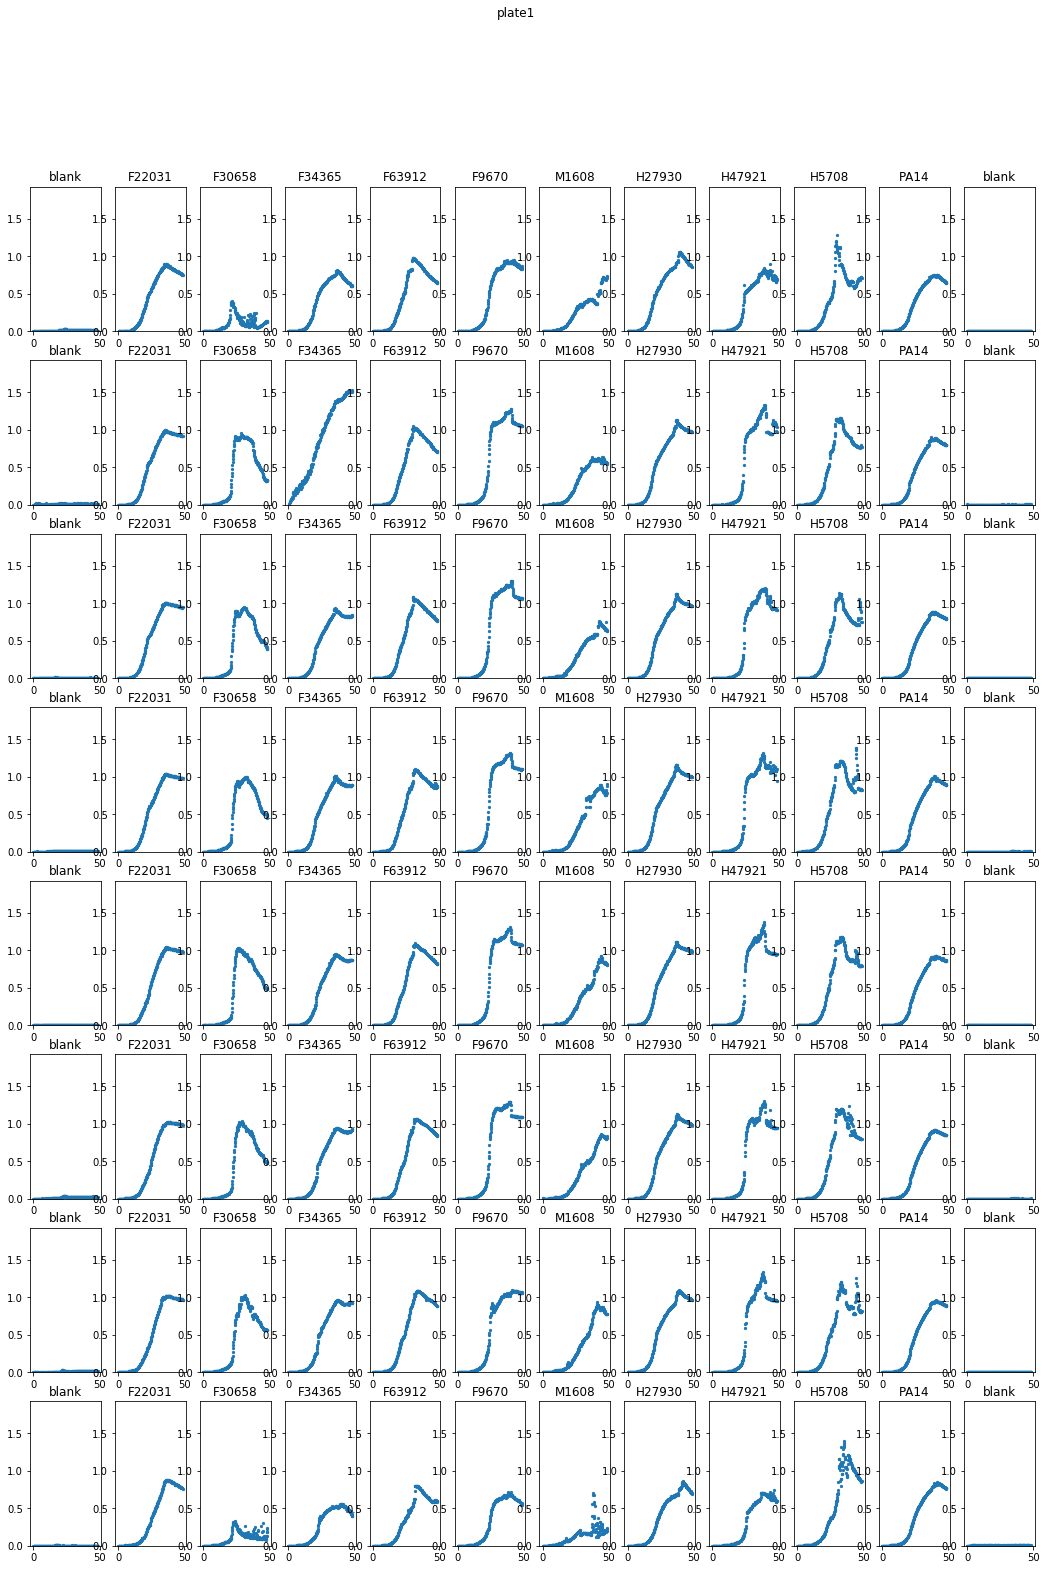

In [4]:
%run biologFunctions.ipynb
G1 = pd.read_excel(filedir+gcExcels[0],header=None, names=None)
G1 = SinglePlate.processExcel(G1)
G1 = SinglePlate.subtractFirstPoint(G1)
row1 = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
strains =('F22031', 'F30658', 'F34365', 'F63912', 'F9670', 'M1608', 'H27930', 'H47921','H5708', 'PA14')
G1 = SinglePlate.renameWellByRowCol(G1, row1,['1', '12'], 'blank')
G1 = SinglePlate.renameWellByRowCol(G1, row1,'2', strains[0])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'3', strains[1])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'4', strains[2])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'5', strains[3])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'6', strains[4])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'7', strains[5])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'8', strains[6])
G1 = SinglePlate.renameWellByRowCol(G1, row1,'9', strains[7])
G1 = SinglePlate.renameWellByRowCol(G1, row1, ['10'], strains[8])
G1 = SinglePlate.renameWellByRowCol(G1, row1,['11'], strains[9])

SinglePlate.plotRawData(G1, 'plate1')

In [134]:
%run biologFunctions.ipynb
# get average of each strain
col2keep=list(range(1,7)) #only keep the growth curve that are not in the wells on the edge of plate

newG1=G1.loc[:,'Time']
for s in strains:  
    sf = SinglePlate.keepColForEachStrain(G1, s, col2keep)
    newG1=pd.concat([newG1, sf],axis=1)


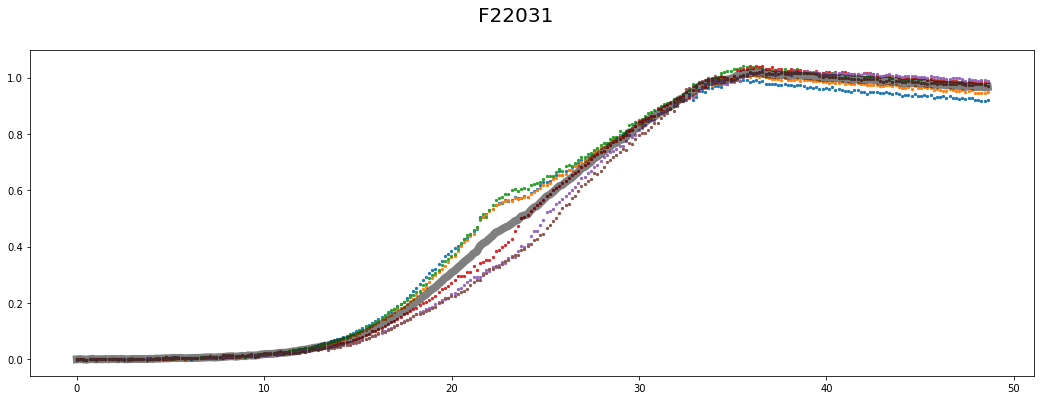

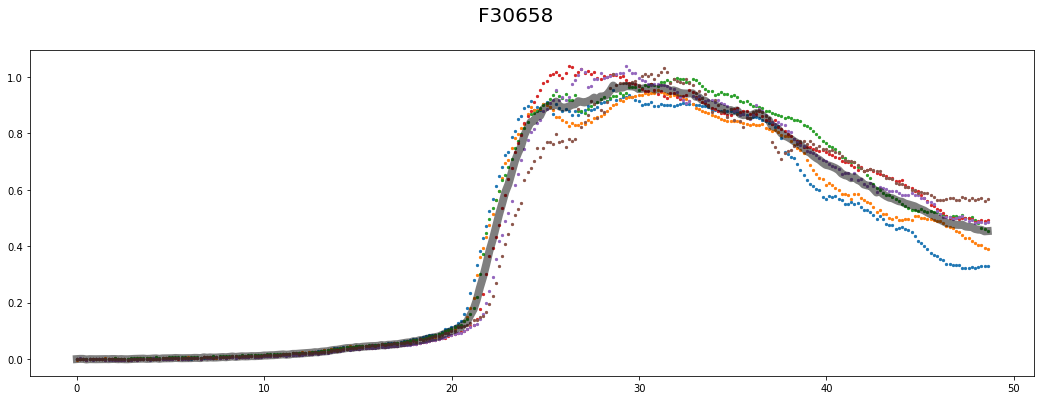

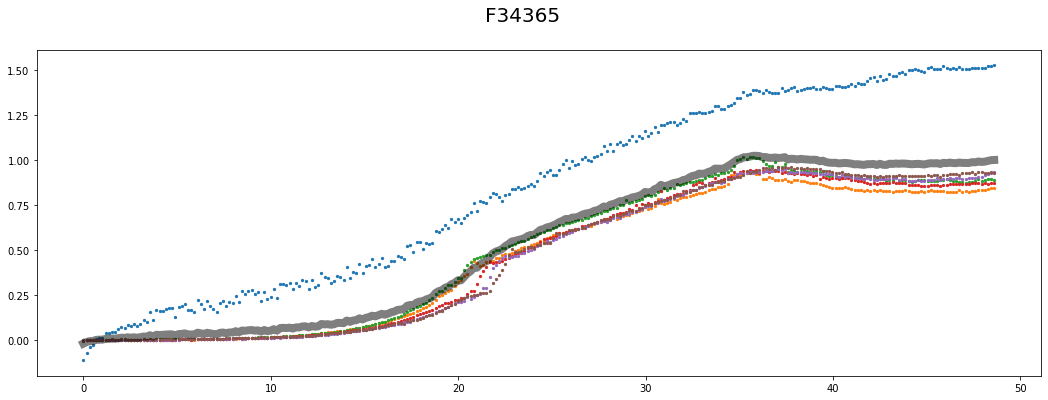

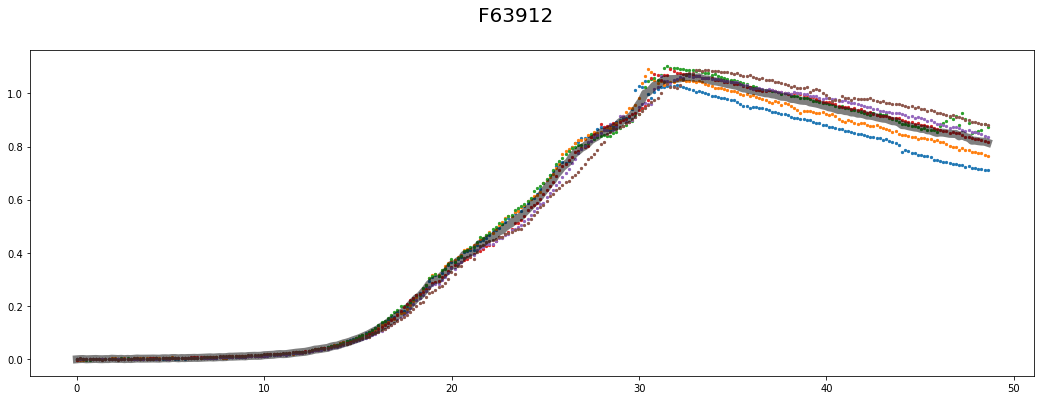

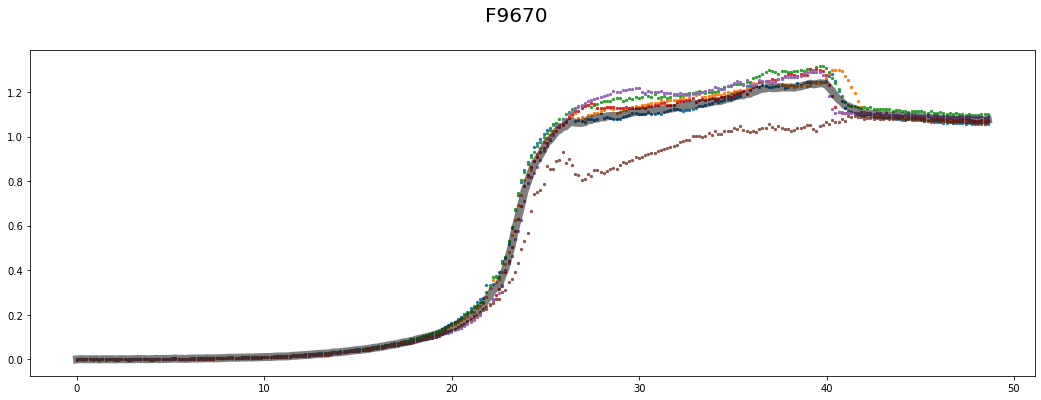

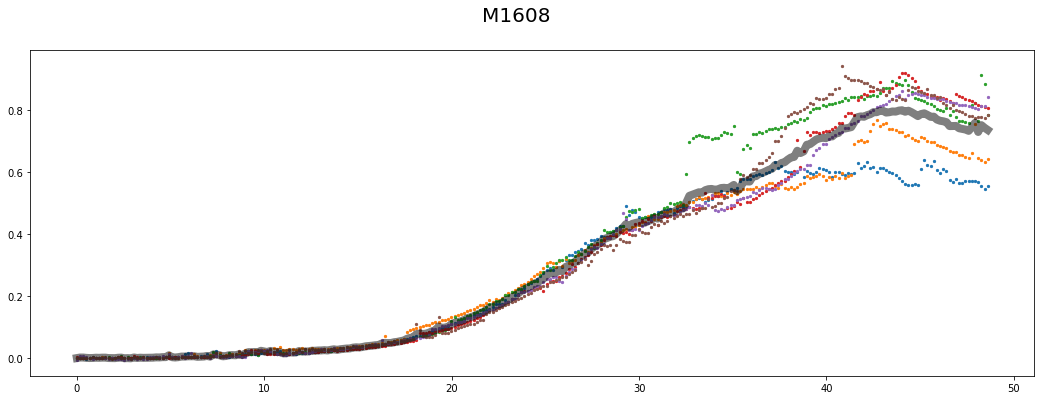

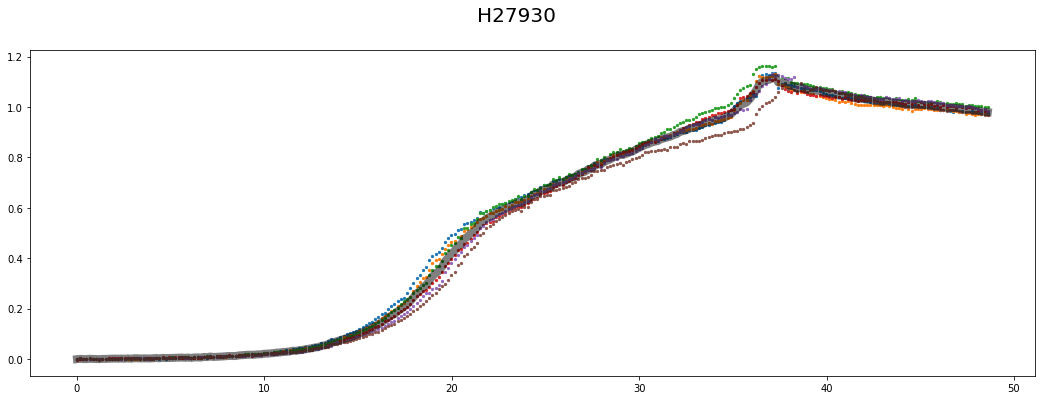

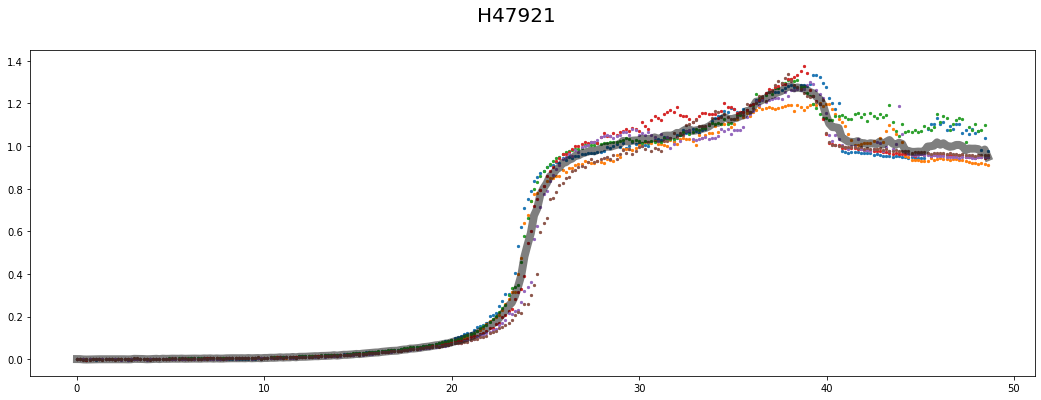

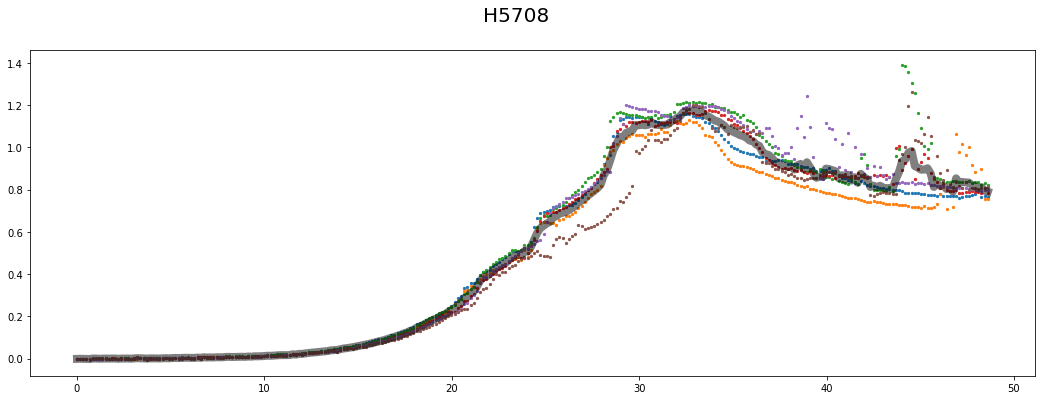

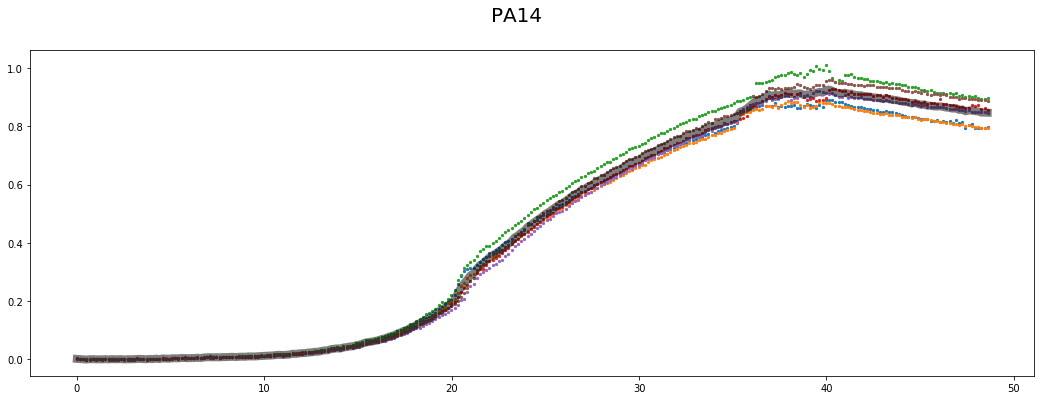

In [194]:
## print one figure for all replicates of each strain
dt = newG1.loc[:, ['Time']]
T1=dt
for st in strains:
    ds = newG1.loc[:, [st]]   
    dsm = ds.mean(axis=1)
    dsm = pd.DataFrame(dsm, columns={st})
    T1 = pd.concat([T1, dsm], axis=1)
    plt.figure(figsize=(18,6))
    for i in range(0,ds.shape[1]):
        plt.scatter(dt, ds.iloc[:,i], s=5)
    plt.plot(dt, dsm, 'k-', linewidth=8, alpha=0.5)
    plt.suptitle(st,size=20)
# T1 = T1.rename(columns={'Time', strains})


In [196]:
T1.to_excel(gcExcels[0]+"mean.xlsx")

In [ ]:
### cluster analysis
